## MNIST
* Tensorflow 2.0 기준으로 작성
* Tensorboard 오류 해결 X → plot

### CNN: convolutional nerual network
* Goal: 이미지의 특징(Edge)를 검출 → 특징 추출 후 합성곱 연산 
* Stride: 한 번의 합성곱 연산마다 필터를 몇 칸씩 이동시킬지 결정하는 값
* Padding: 피쳐맵 크기가 줄어들지 않도록 입력 이미지 가장자리들에 특정값 fill
* Channel; ex. Color channel
* feature map = pre feature map * 1 / stride + filter

In [35]:
#1. 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import datetime

In [36]:
#1. 파라미터 값 세팅
algorithm = "CNN"
img_size = 28
data_size = img_size**2

num_label=10

batch_size=256
num_epoch=50

learning_rate = 0.00025

date_time = datetime.datetime.now().strftime("%Y%m%d-%H-%M-%S")

save_path = "../saved_models/"+date_time+"_"+algorithm
load_path = "../saved_models/20190312-11-12-35_CNN/model/model"
load_model = False

In [62]:
# 2. MNIST 데이터 불러오기
mnist=tf.keras.datasets.mnist.load_data(path="mnist.npz")

x_train = mnist[0][0]
y_train = mnist[0][1]
x_test = mnist[1][0]
y_test = mnist[1][1]



#데이터의 수, 이미지의 크기, 이미지의 크기 -> -1, 이미지의 크기, 이미지의 크기, 체널 수
x_train = np.reshape(x_train, [-1, img_size, img_size , 1])
x_test = np.reshape(x_test, [-1, img_size, img_size, 1]) 

# 실제값을 onehot(특정 위치는 1, 나머지는 0)으로 변환
y_train_onehot = np.zeros([y_train.shape[0], num_label])
y_test_onehot = np.zeros([y_test.shape[0], num_label])

for i in range(y_train.shape[0]):
    y_train_onehot[i,y_train[1]]=1
    
# Validation Set

x_train, x_val = x_train[:len(x_train)*9//10], x_train[len(x_train)*9//10:]
y_train, y_val = y_train[:len(y_train)*9//10], y_train[len(y_train)*9//10:]

x_val = np.reshape(x_val, [-1, img_size, img_size,1])

In [63]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [64]:
#3. CNN
CNN = tf.keras.Sequential([
        layers.Conv2D(input_shape=(img_size,img_size,1),filters=32, activation="relu", kernel_size=3, strides=(2,2), padding="same"),
        layers.Conv2D(filters=64, activation="relu", kernel_size=3, strides=(2,2), padding="same"),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_label)
])

In [65]:
CNN.compile(loss="sparse_categorical_crossentropy",
           optimizer=optimizers.Adam(lr=learning_rate),
           metrics=["accuracy"])
CNN.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = CNN.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs = num_epoch,
    validation_data = (x_val, y_val)
)

Epoch 1/50
211/211 [==============================] - 1s 7ms/step - loss: 3.0736 - accuracy: 0.2614 - val_loss: 2.0593 - val_accuracy: 0.2385
Epoch 2/50
211/211 [==============================] - 1s 6ms/step - loss: 2.0109 - accuracy: 0.2778 - val_loss: 1.9620 - val_accuracy: 0.2270
Epoch 3/50
211/211 [==============================] - 1s 5ms/step - loss: 1.8911 - accuracy: 0.2221 - val_loss: 1.8569 - val_accuracy: 0.2392
Epoch 4/50
211/211 [==============================] - 1s 5ms/step - loss: 1.7970 - accuracy: 0.2220 - val_loss: 1.5816 - val_accuracy: 0.2128
Epoch 5/50
211/211 [==============================] - 1s 5ms/step - loss: 1.7145 - accuracy: 0.2802 - val_loss: 1.5867 - val_accuracy: 0.3795
Epoch 6/50
211/211 [==============================] - 1s 5ms/step - loss: 1.6307 - accuracy: 0.5309 - val_loss: 1.4197 - val_accuracy: 0.8078
Epoch 7/50
211/211 [==============================] - 1s 5ms/step - loss: 1.8523 - accuracy: 0.7134 - val_loss: 2.0151 - val_accuracy: 0.7063
Epoch 

In [67]:
y_pred = np.argmax(CNN.predict(x_test), axis=-1)

In [68]:
CNN.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2059 - accuracy: 0.3515


[2.205881357192993, 0.351500004529953]

In [70]:
CNN.save(save_path)
print("Model is saved in {}".format(save_path + "/model/model"))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../saved_models/20210315-21-06-13_CNN\assets
Model is saved in ../saved_models/20210315-21-06-13_CNN/model/model


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


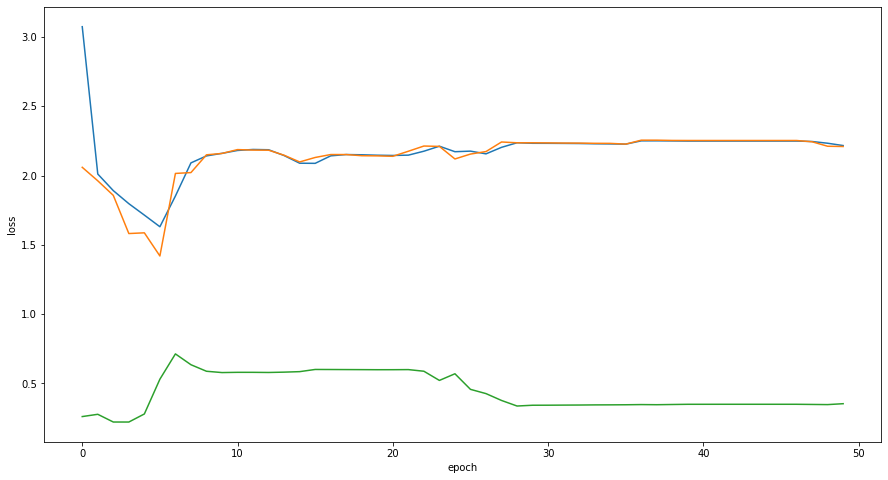

In [72]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

plt.figure(figsize=(15,8))

plt.xlabel("epoch")
plt.ylabel("loss")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history["accuracy"])